<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
Y = data['Class'].to_numpy()
print(Y)


[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X = scaler.fit_transform(X)

# Now X is standardized


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [12]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
logreg = LogisticRegression()

# Define the parameters to tune
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'solver': ['liblinear']    # Solver needed for L1 penalty
}

# Create a GridSearchCV object with logistic regression and cross-validation of 10
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

# Fit the object to the data (assuming X is your input data and y is your target variable)
logreg_cv.fit(X, Y)

# Find the best parameters
print("Best parameters found: ", logreg_cv.best_params_)


Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you already have X and y defined

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the GridSearchCV object with the training data
logreg_cv.fit(X_train, y_train)

# Calculate accuracy on the test data
accuracy = logreg_cv.score(X_test, y_test)

print(f"Accuracy on test data: {accuracy:.2f}")


Accuracy on test data: 0.94


Lets look at the confusion matrix:


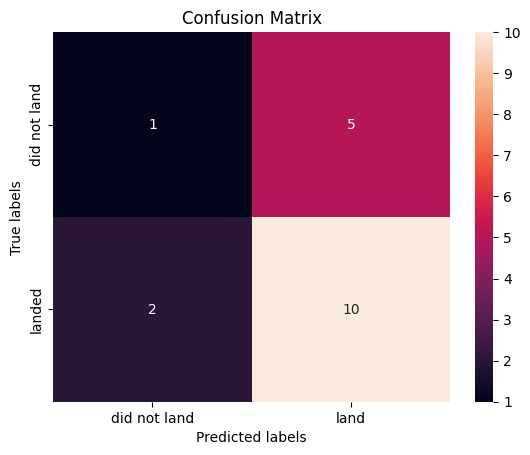

In [19]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM object
svm = SVC()

# Define the parameter grid to search over
parameters = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf' kernel
}

# Create a GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data (X_train and y_train should be defined)
svm_cv.fit(X_train, y_train)

# Find and print the best parameters
print("Best parameters found: ", svm_cv.best_params_)


Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [22]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.8160714285714284


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an SVM object
svm = SVC()

# Define the parameter grid to search over
parameters = {
    'kernel': ['linear', 'rbf', 'sigmoid'],  # Different kernels to test
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'sigmoid'
}

# Create a GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, y_train)

# Print the best kernel and its corresponding score
print("Best kernel found: ", svm_cv.best_params_['kernel'])
print("Best validation score: {:.2f}".format(svm_cv.best_score_))


Best kernel found:  sigmoid
Best validation score: 0.82


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, y_train)

# Calculate the accuracy on the test data using the score method
accuracy = svm_cv.score(X_test, y_test)

# Print the accuracy
print(f"Accuracy on test data: {accuracy:.2f}")


Accuracy on test data: 0.89


We can plot the confusion matrix


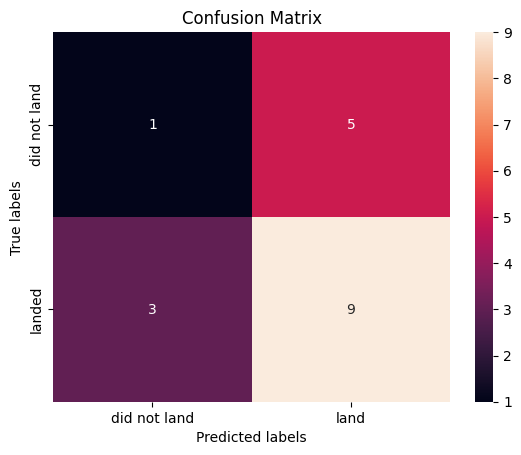

In [25]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Define the parameter grid for tuning
parameters = {
    'criterion': ['gini', 'entropy'],  # Measure of quality of a split
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 5, 10]  # Minimum number of samples at a leaf node
}

# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data (X_train and y_train should be defined)
tree_cv.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", tree_cv.best_params_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [28]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
accuracy : 0.8607142857142858


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
parameters = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, y_train)

# Get the best estimator
best_tree = tree_cv.best_estimator_

# Calculate the accuracy on the test data using the best estimator
test_accuracy = best_tree.score(X_test, y_test)

# Print the accuracy
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on test data: 94.44%


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, y_train)

# Calculate the accuracy on the test data using the score method
accuracy = tree_cv.score(X_test, y_test)

# Print the accuracy
print(f"Accuracy on test data: {accuracy:.2f}")


Accuracy on test data: 0.94


We can plot the confusion matrix


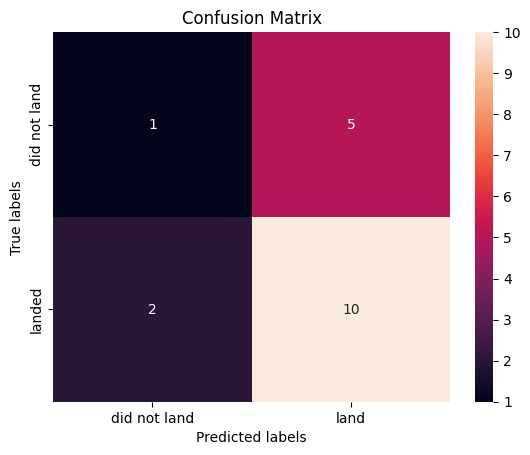

In [31]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [32]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a KNN object
knn = KNeighborsClassifier()

# Define the parameter grid for tuning
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}

# Create a GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the GridSearchCV object to the training data (X_train and y_train should be defined)
knn_cv.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", knn_cv.best_params_)


Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [34]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
accuracy : 0.832142857142857


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [35]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, y_train)

# Calculate the accuracy on the test data using the score method
accuracy = knn_cv.score(X_test, y_test)

# Print the accuracy
print(f"Accuracy on test data: {accuracy:.2f}")


Accuracy on test data: 0.94


We can plot the confusion matrix


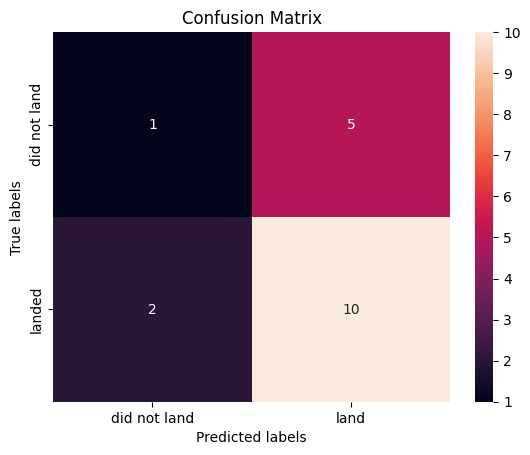

In [36]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [37]:
# Assuming you have already defined and trained each model with GridSearchCV
# And have X_test and y_test for evaluation

# For Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameters and perform GridSearchCV
logreg = LogisticRegression()
parameters_logreg = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
logreg_cv = GridSearchCV(logreg, parameters_logreg, cv=10)
logreg_cv.fit(X_train, y_train)
logreg_accuracy = logreg_cv.score(X_test, y_test)

# For Support Vector Machine
from sklearn.svm import SVC

# Define parameters and perform GridSearchCV
svm = SVC()
parameters_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, y_train)
svm_accuracy = svm_cv.score(X_test, y_test)

# For Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Define parameters and perform GridSearchCV
tree = DecisionTreeClassifier()
parameters_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40],
                   'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, y_train)
tree_accuracy = tree_cv.score(X_test, y_test)

# For K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Define parameters and perform GridSearchCV
knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, y_train)
knn_accuracy = knn_cv.score(X_test, y_test)

# Print the accuracies for comparison
print(f"Logistic Regression accuracy: {logreg_accuracy:.2f}")
print(f"SVM accuracy: {svm_accuracy:.2f}")
print(f"Decision Tree accuracy: {tree_accuracy:.2f}")
print(f"K-Nearest Neighbors accuracy: {knn_accuracy:.2f}")

# Determine the best performing method
best_method = max(('Logistic Regression', logreg_accuracy),
                   ('SVM', svm_accuracy),
                   ('Decision Tree', tree_accuracy),
                   ('K-Nearest Neighbors', knn_accuracy),
                   key=lambda x: x[1])

print(f"The best performing method is {best_method[0]} with an accuracy of {best_method[1]:.2f}")


Logistic Regression accuracy: 0.94
SVM accuracy: 0.89
Decision Tree accuracy: 0.94
K-Nearest Neighbors accuracy: 0.94
The best performing method is Logistic Regression with an accuracy of 0.94


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
